<a href="https://colab.research.google.com/github/MohammadAburub93/Python-Data-Science-Practice/blob/main/Lego_Analysis/Lego_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://i.imgur.com/49FNOHj.jpg">

# Import Statments

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

In [ ]:
color_df = pd.read_csv('data/colors.csv')

In [ ]:
color_df.tail()

,id,name,rgb,is_trans
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f
134,9999,[No Color],05131D,f


In [ ]:
color_df['name'].nunique()

135

In [ ]:
color_df.is_trans.value_counts()

,count
is_trans,
f,107
t,28


In [ ]:
color_df.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


### **Understanding LEGO Themes vs. LEGO Sets**

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="https://i.imgur.com/aKcwkSx.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="https://i.imgur.com/whB1olq.png ">

In [ ]:
sets_df = pd.read_csv('data/sets.csv')

In [ ]:
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [ ]:
sets_df.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


In [ ]:
sets_df.sort_values('year').head()

,set_num,name,year,theme_id,num_parts
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9534,700.2-1,Large Gift Set (ABB),1949,365,178


In [ ]:
sets_df[sets_df['year'] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [ ]:
sets_df.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


In [ ]:
sets_by_year = sets_df.groupby('year').count()

In [ ]:
sets_by_year['set_num'].head()


,set_num
year,
1949,5
1950,6
1953,4
1954,14
1955,28


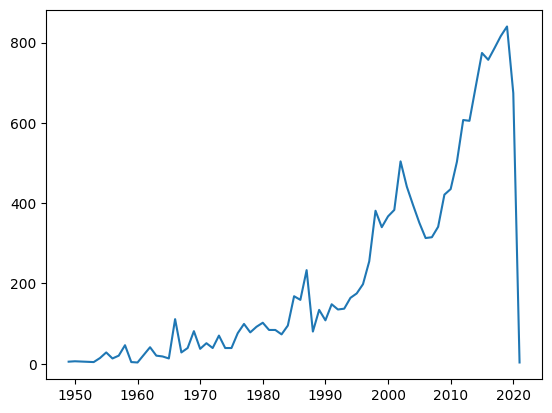

In [48]:
plt.plot(sets_by_year.index, sets_by_year['set_num'])

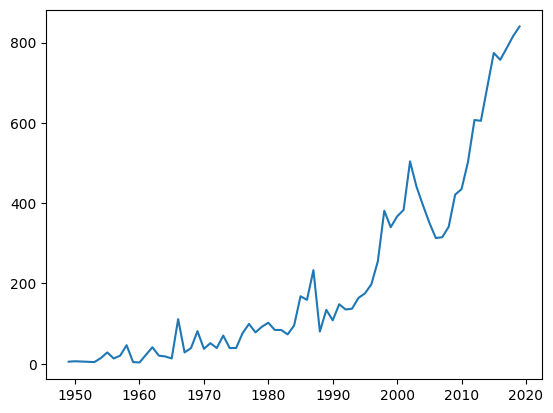

In [51]:
plt.plot(sets_by_year.index[:-2], sets_by_year['set_num'][:-2])

## **Observation**: as LEGO company had a steady growth in products produced from the mid 1950s to mid 1980s, the big growth of the company products started in the mid 1990s.

In [53]:
themes_by_year = sets_df.groupby('year').agg({'theme_id': pd.Series.nunique})
print(themes_by_year)

      theme_id
year          
1949         2
1950         1
1953         2
1954         2
1955         4
...        ...
2017        89
2018        93
2019        78
2020        82
2021         1

[71 rows x 1 columns]


In [56]:
themes_by_year.rename(columns = {'theme_id': 'theme_num'}, inplace = True)
themes_by_year.head()

,theme_num
year,
1949,2
1950,1
1953,2
1954,2
1955,4


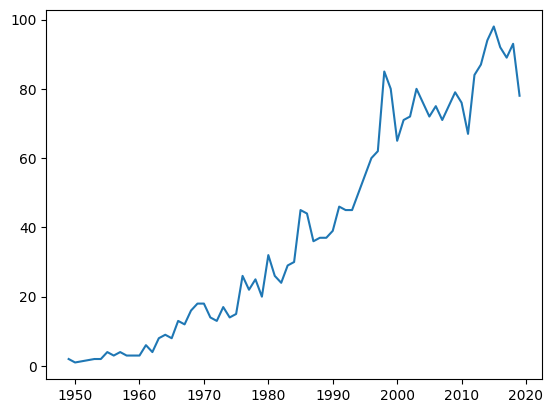

In [57]:
plt.plot(themes_by_year.index[:-2], themes_by_year.theme_num[:-2])

## **Observation**: LEGO number of themes released has been increased year over year from mid 1950s until around 2000 and then the number of themes released has been around the same number for about 10 years.

### Line Charts with Two Seperate Axes

Text(0, 0.5, 'Number of Themes')

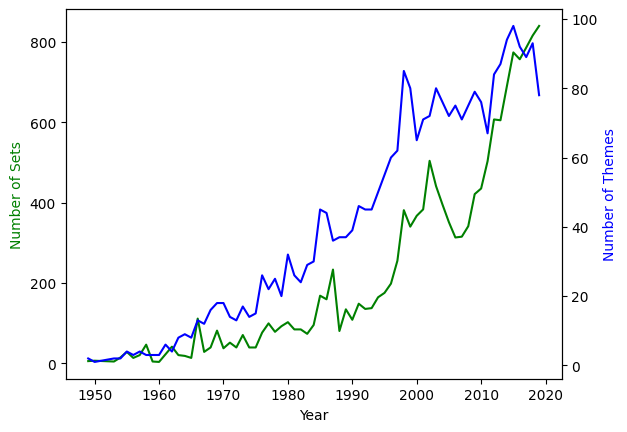

In [60]:
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(sets_by_year.index[:-2], sets_by_year['set_num'][:-2], color='g')
ax2.plot(themes_by_year.index[:-2], themes_by_year.theme_num[:-2], color='b')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets', color='g')
ax2.set_ylabel('Number of Themes', color='b')

In [66]:
parts_per_set = sets_df.groupby('year').agg({'num_parts': pd.Series.mean})
parts_per_set.rename(columns = {"num_parts": "average num_parts"}, inplace=True)
parts_per_set.head()


,average num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


In [67]:
parts_per_set.tail()

,average num_parts
year,
2017,221.840967
2018,213.618873
2019,207.510714
2020,259.732938
2021,0.000000


### Scatter Plots in Matplotlib

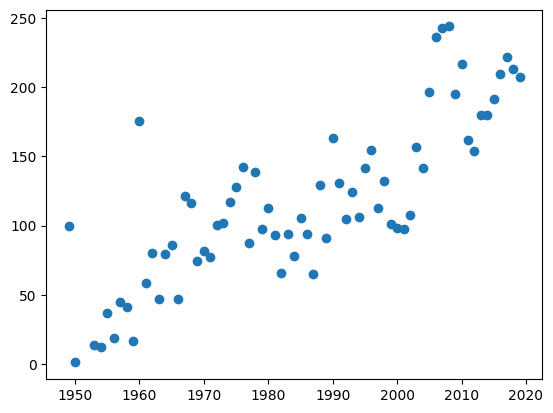

In [68]:
plt.scatter(parts_per_set.index[:-2], parts_per_set['average num_parts'][:-2])

## **Observation**: The average of parts number for the LEGO sets has an upward trend which indicates increasing in the set complexity over years

### Number of Sets per LEGO Theme

In [71]:
set_theme_count= sets_df['theme_id'].value_counts()
set_theme_count[:5]

,count
theme_id,
158,753
501,656
494,398
435,356
503,329


<img src="https://i.imgur.com/Sg4lcjx.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv.

In [72]:
themes_df = pd.read_csv("data/themes.csv")

In [74]:
themes_df.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [94]:
themes_df[themes_df['name'] == 'Star Wars']


,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [96]:
sets_df[sets_df.theme_id == 209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


In [97]:
sets_df[sets_df.theme_id == 18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


### Merging (i.e., Combining) DataFrames based on a Key


In [99]:
set_theme_count = pd.DataFrame({'id': set_theme_count.index, 'set_count': set_theme_count.values})

In [100]:
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [101]:
merged_df = pd.merge(set_theme_count, themes_df, on='id')

In [102]:
merged_df[:3]

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN


<BarContainer object of 10 artists>

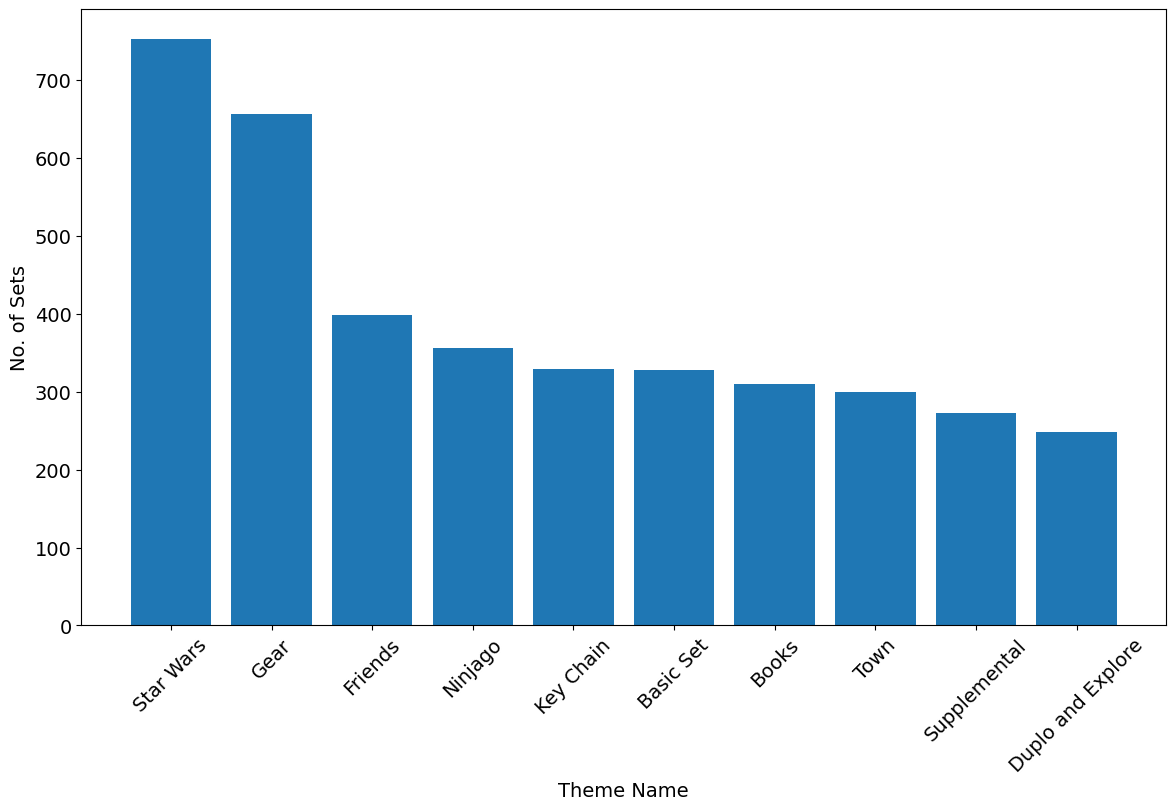

In [106]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.xlabel('Theme Name', fontsize=14)
plt.ylabel('No. of Sets', fontsize=14)
plt.bar(merged_df.name[:10], merged_df.set_count[:10])